# main

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import copy
import auxiliary as aux

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':9,
    'ytick.labelsize':9,
    'axes.labelsize':12,
})

import os
import re

%reload_ext autoreload
%autoreload 2

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [3]:
# output directory
src_n = 0
dataDir = f'../data.lbm/{src_n}/'
# dataDir = f'../src/{src_n}/output.lbm/'

# all ticks are found using regular expressions
files = os.listdir(dataDir)
ticks = []

pattern = r'fluidTrj_(\d+)\.csv'

for file in files:
    match = re.search(pattern, file)
    if match:
        ticks.append(int(match.group(1)))
        
ticks.sort()

len(ticks)

100

In [4]:
dataDirs = [f'../data.lbm/{src_n}/' for src_n in range(3)]

# Fluid

In [5]:
id = -1

pusher = pd.read_csv(dataDirs[0] + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
pusherParticleDf = pd.read_csv(dataDirs[0]+"particlesTrj.csv")

neutral = pd.read_csv(dataDirs[1] + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
neutralParticleDf = pd.read_csv(dataDirs[1]+"particlesTrj.csv")

puller = pd.read_csv(dataDirs[2] + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
pullerParticleDf = pd.read_csv(dataDirs[2]+"particlesTrj.csv")

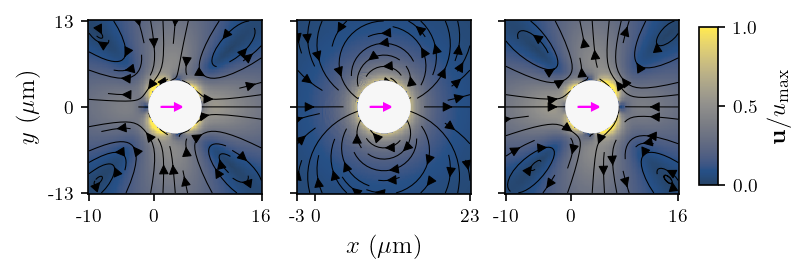

In [6]:
lims = 13
fig, axes = aux.squirmersOverview(pusher, neutral, puller, pusherParticleDf, neutralParticleDf, pullerParticleDf, lims)
plt.savefig("figs/figure1.png", format="png", transparent=True, dpi=72, bbox_inches="tight")
plt.savefig("figs/figure1hd.png", format="png", transparent=True, dpi=300, bbox_inches="tight")
plt.show()

In [7]:
meanSquirmerSpeed = np.mean(np.sqrt(pusherParticleDf.velocity_x**2+pusherParticleDf.velocity_y**2))
meanSquirmerSpeed

np.float64(0.0001586147116582921)

In [8]:
meanSquirmerSpeed = np.mean(np.sqrt(neutralParticleDf.velocity_x**2+neutralParticleDf.velocity_y**2))
meanSquirmerSpeed

np.float64(0.0005130427136233218)

In [9]:
meanSquirmerSpeed = np.mean(np.sqrt(pullerParticleDf.velocity_x**2+pullerParticleDf.velocity_y**2))
meanSquirmerSpeed

np.float64(0.00015917462261778932)

# Stability analysis

In [10]:
def avgSpeed(df):
    return np.sqrt(df.fluidVelocity_x**2 + df.fluidVelocity_y**2).mean()

## pusher

In [11]:
avgFluidSpeed = []
time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDirs[0] + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

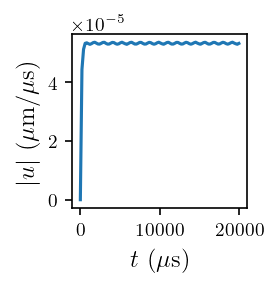

In [12]:
fig, ax = plt.subplots(figsize = (1.5,1.5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# neutral

In [13]:
avgFluidSpeed = []
time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDirs[1] + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

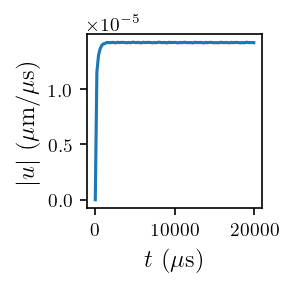

In [14]:
fig, ax = plt.subplots(figsize = (1.5,1.5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# puller

In [15]:
avgFluidSpeed = []
time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDirs[2] + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

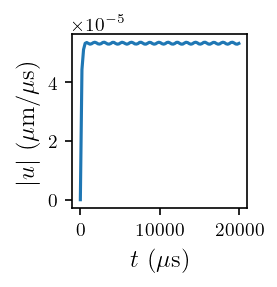

In [16]:
fig, ax = plt.subplots(figsize = (1.5,1.5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()